# Introduction to NLP Fundamentals in Tensorflow

NLP has the goal of deriving information out of natural language (could be sequences, text or speech).
Another common term for NLP problem is sequence to sequence problems (seq2seq).

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0858d133-0ccb-0a5a-7c36-4b9ca1273a60)


## Get helper functions

In [2]:
# Get helper functions (Download helper functions script from JonasHagstrom79/Tensorflow(raw))
!wget https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py

--2024-03-12 18:04:08--  https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  13.07K  --.-KB/s    in 0s      

2024-03-12 18:04:09 (106 MB/s) - ‘helper.py’ saved [13380/13380]



In [3]:
# Import
from helper import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text sample of tweeets labelled as disaster or not disaster).
Original source [here](https://www.kaggle.com/c/nlp-getting-![2024-02-10 (7).png](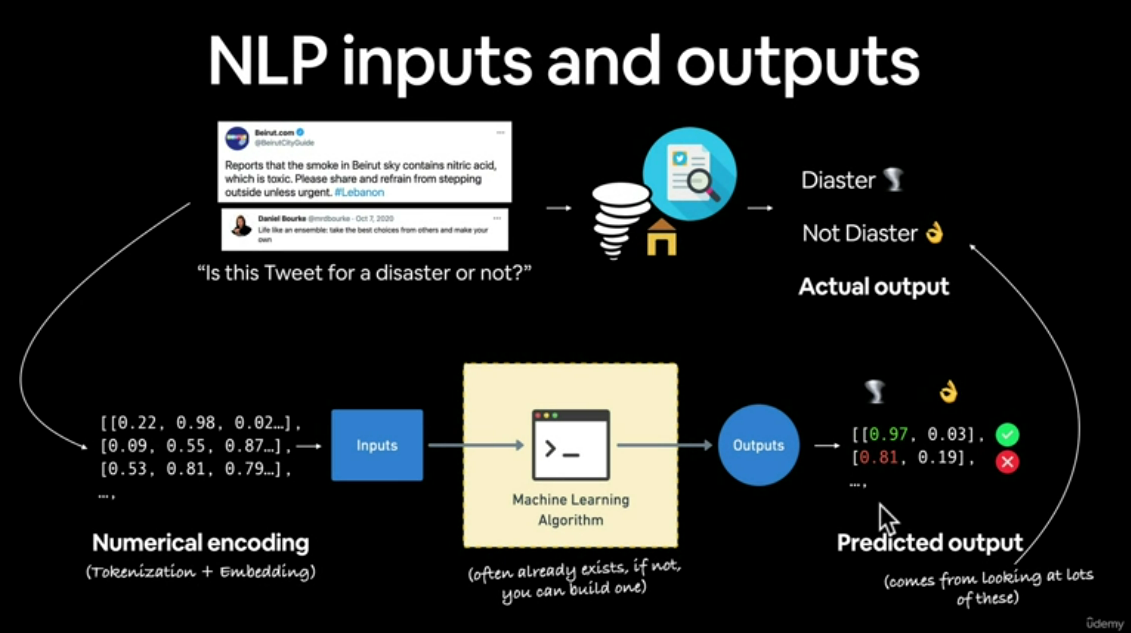![2024-02-10 (7).png](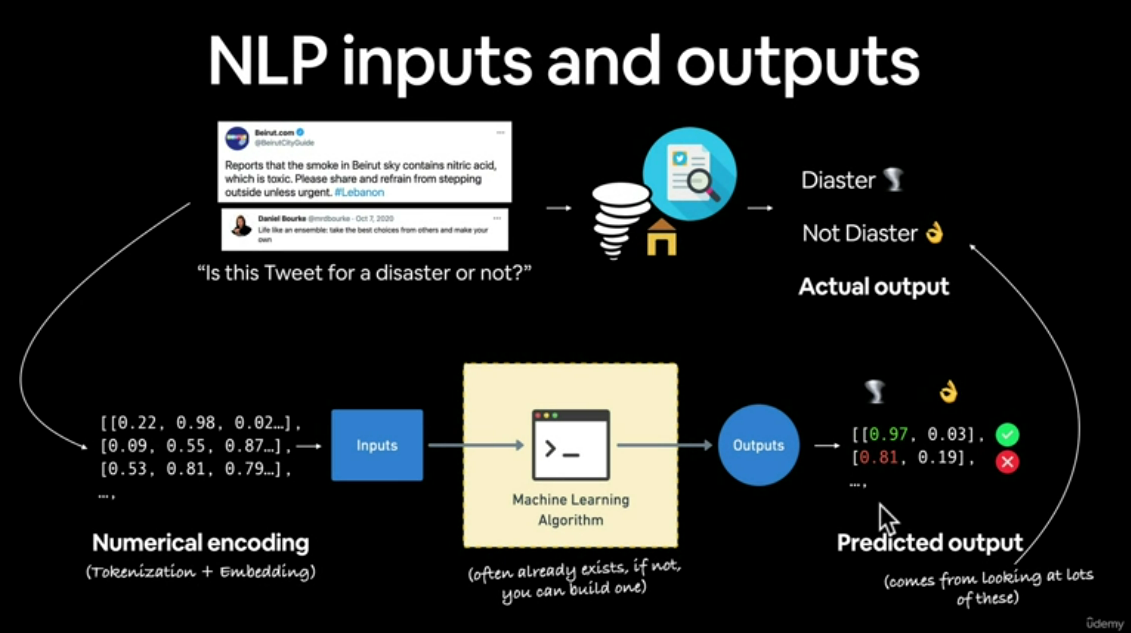![2024-02-10 (7).png](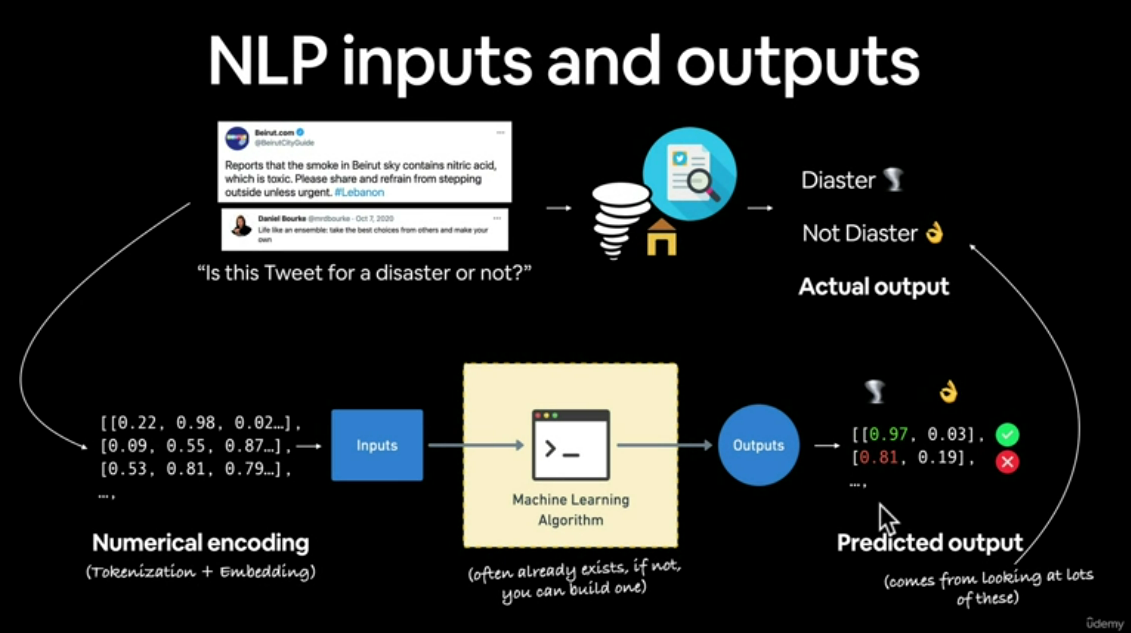![2024-02-11 (3).png](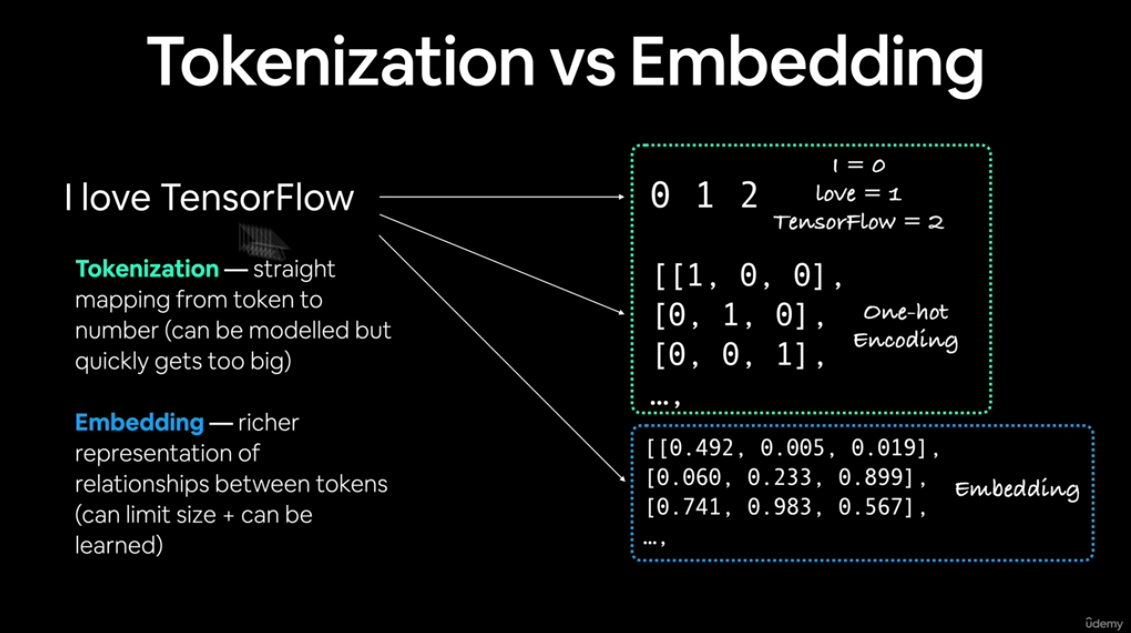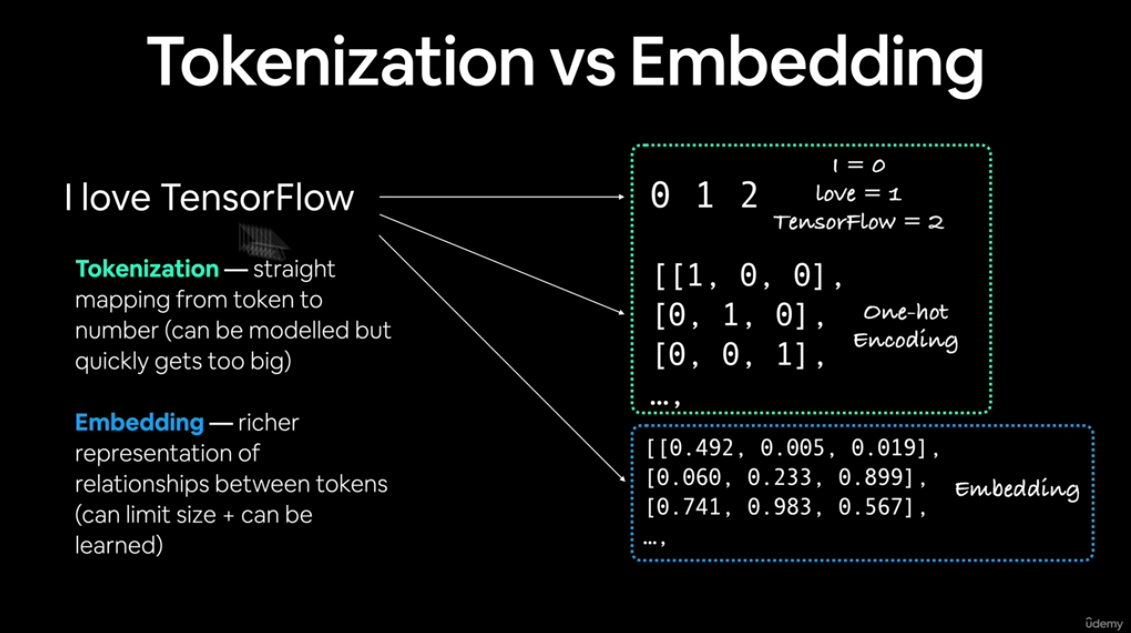))))started)

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-03-12 18:04:12--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2024-03-12 18:04:12 (103 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Unzip data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

To visualize our text samples, we fitst have to read them in, one way to do so would be to use [python](https://realpython.com/read-write-files-python/)

I prefer to get visual straight away.

Another way to do this is to use pandas.

In [6]:
# Pandas have a methos load_csv
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# What does the test dataframe look like? (no target)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

The data looks balaced, shhould it not be balanced there is a [method](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data) in tensorflow to fix this.

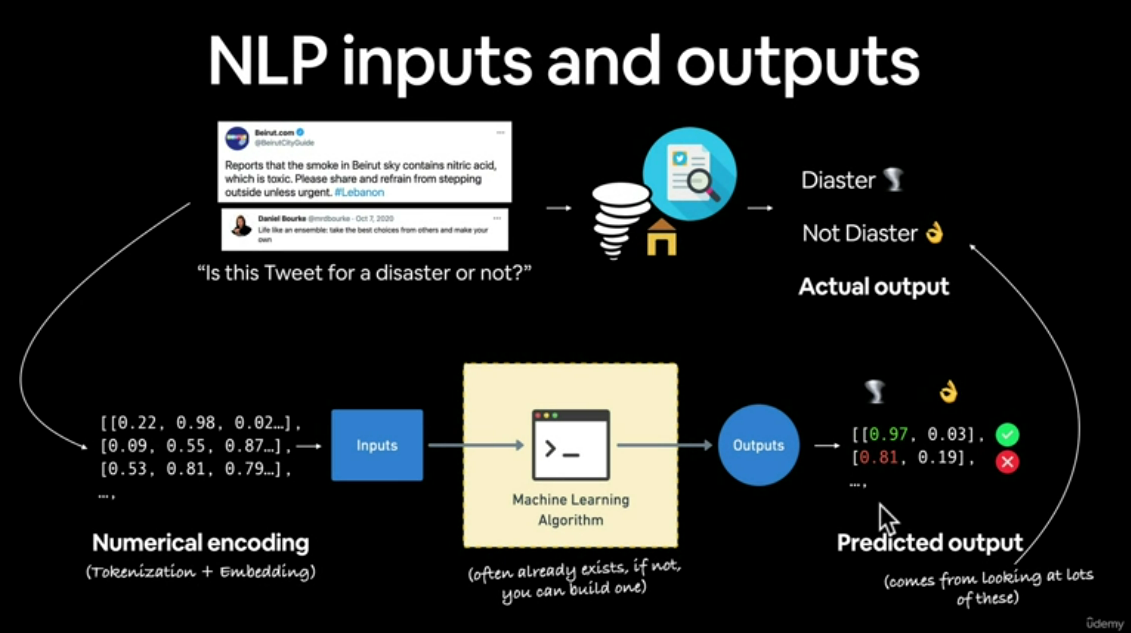placeholder picture (2024-02-10 (7).png)

In [10]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# Lets visualize some random training examples
import random
random_index = random.randint(0, len(train_df) -5) # -5 so we dont go past the lenght of the frame
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
She's kinda hot played on the radio today. What's next? Disease to all? The apocalypse has started everyone. Be careful.

---

Target: 0 (not real disaster)
Text:
So now that Di Maria has left my dear #mufc  back to the Hazard-Di Maria argument.... I'd say Hazard is way better ?? idc

---

Target: 0 (not real disaster)
Text:
A segment of the V/H/S anthology series is getting the feature film treatment:... http://t.co/LqJMuAxJUU

---

Target: 0 (not real disaster)
Text:
Everything has sunk in except the fact that I am actually moving to the state of Colorado tomorrow. Been dreaming of it since I was a kid.??

---

Target: 0 (not real disaster)
Text:
@tanehisicoates even the second half has that great Greek Tragedy laced monologue by Charlize. coulda been so much more.

---



### Split data into training and validation set

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Use train_test_split to split training data into training and validation sets
train_scentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                             train_df_shuffled["target"].to_numpy(),
                                                             test_size=0.1, # use 10% of training data for validation
                                                             random_state=42)

In [14]:
# Check the lengths
len(train_scentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [15]:
# Check the first 10 samples
train_scentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers
[word embedings](https://www.tensorflow.org/text/guide/word_embeddings)

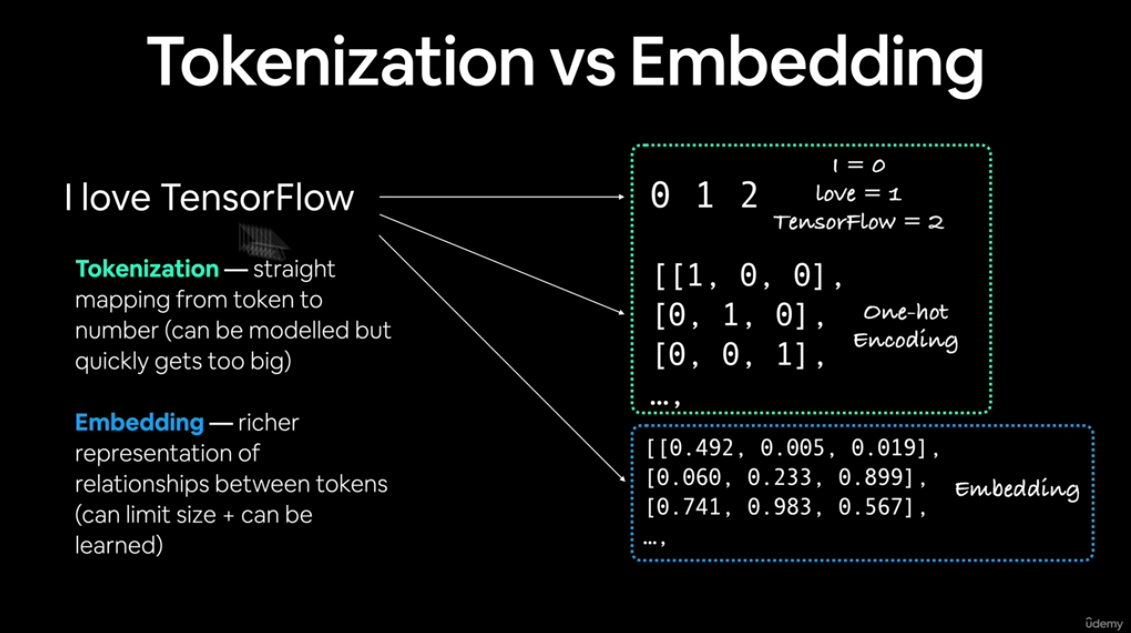placeholder (2024-02-11 (3).png)

## Converting text into numbers

When dealing with a text problem, one of the first things
you'll have to do before you can build a model to convert
your text to numbers.

There are a few ways to do this, namely:
* Tokenaziation - direct mapping of token ( a token could be a
word or charachter) to number.
* Embedding - create a matrix of feature vector for each token
(the size of features vector can be defined and this embedding can
 be learned)

## Text vectorization (tokenization)

In [16]:
train_scentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000 # Max numbers of words to have in our vocabulary

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # How many woeds in the vocabulary (automatically addd <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # Creates words of n-words?
                                    output_mode="int", # How to map tokens to numbers
                                    output_sequence_length=None, # How long do you want your sequences to be?
                                    pad_to_max_tokens=True)

resource: [textVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)

In [18]:
# Find the average numbers of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_scentences])/len(train_scentences))

15

In [19]:
# Set up text vectorization variables
max_lenght = 15 # Max lenght our sequeces will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int", # How to map tokens to numbers
                                    output_sequence_length=max_lenght)

In [20]:
# Fit the text vectorizer to the train text
text_vectorizer.adapt(train_scentences)

In [21]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

The sentence is only 6 words long, the 0 make up for the spaces up to 15 wich is max_lenght

In [22]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_scentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 Truck fire clogs canyon road http://t.co/JRDwyy0aX4      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 259,   42,    1, 1704,  366,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [23]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # Get all the uniqe words in our training data
top_5_words = words_in_vocab[:5] # Get thr most common words
bottom_5_words = words_in_vocab[-5:] # Gry yhe least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


[UNK] stands for unknown token, its a word outside of the top 10000

### Creating an Embedding using an Embeddding Layer

To make our embedding, ew're going to use TensorFlows's embedding layer: [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

The parameters we care most about for our embedding layer:

* `input_dim` = the size of our vocabulary.
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represeted by a vector 100 long.
* `input_length` = length of the sequences being passed to the embedding layer.

In [24]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # Set input shape
                             output_dim=128, # Output shape, set the number by something divisible by 8 and you might se a speedupin computing
                             input_length=max_lenght # How long is each input
                             )
embedding

In [25]:
# Get a random sentence from the training set
random_sentence = random.choice(train_scentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into a dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 http://t.co/DeQQOpSP4f: Iger's 3 words that wrecked Disney's stock http://t.co/LbKvFqRpgT http://t.co/3rVa5uvt0P        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02987492, -0.0014032 , -0.03265253, ..., -0.03324156,
          0.03742737, -0.01516483],
        [ 0.02077055, -0.02173005, -0.04966705, ...,  0.02494593,
         -0.01114912, -0.04365138],
        [ 0.04941538, -0.03953327, -0.00767221, ...,  0.01294167,
          0.04237589,  0.01489519],
        ...,
        [ 0.00535203, -0.00520016, -0.02150328, ...,  0.03296466,
          0.03137828,  0.0342723 ],
        [ 0.00535203, -0.00520016, -0.02150328, ...,  0.03296466,
          0.03137828,  0.0342723 ],
        [ 0.00535203, -0.00520016, -0.02150328, ...,  0.03296466,
          0.03137828,  0.0342723 ]]], dtype=float32)>

In [26]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02987492, -0.0014032 , -0.03265253, -0.01651514,  0.01730361,
         0.01375775, -0.0014377 ,  0.03376844, -0.04846274,  0.00392135,
        -0.03133707,  0.00143532,  0.01342319, -0.04814012, -0.03174818,
        -0.00447213,  0.04145113, -0.04178535,  0.00908375,  0.04646396,
        -0.01839609, -0.01545669,  0.010171  , -0.02119423,  0.0181863 ,
         0.00093799, -0.02548916,  0.01112224, -0.02857555,  0.01081837,
         0.02619071, -0.00809857,  0.0340273 ,  0.02973786, -0.02991854,
        -0.02542748, -0.04327462, -0.02024217, -0.04007257, -0.04708148,
        -0.02550796,  0.04433599,  0.02437473, -0.00124589,  0.04757528,
         0.00237551,  0.03450112, -0.03342109,  0.04644212, -0.00862827,
         0.01804252,  0.01638682,  0.01727495,  0.02752567,  0.04020718,
        -0.01632684,  0.04470703, -0.01497936,  0.00335057,  0.04641743,
        -0.03296018,  0.02433225,  0.00854611,  0.01154394, -0.04665175,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way toturn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline an move on from there.

* Model 0: Naive Bayes (baseline) from [Sklearn ML](gttps://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Didirectional_LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a bseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_scentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [29]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

comparing th following:
* Accuracy
* Precision
* Recall
* F1-score

For a deep overwiev se the Sklearn [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)![rnn.png](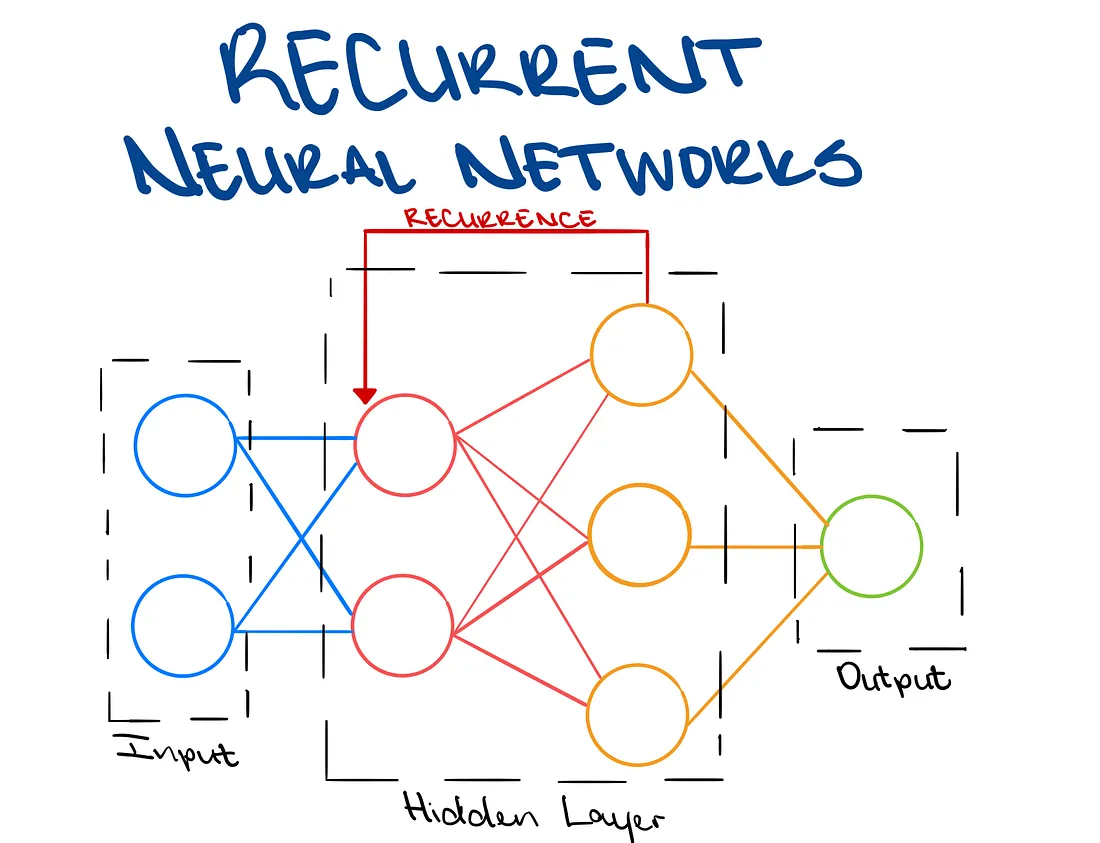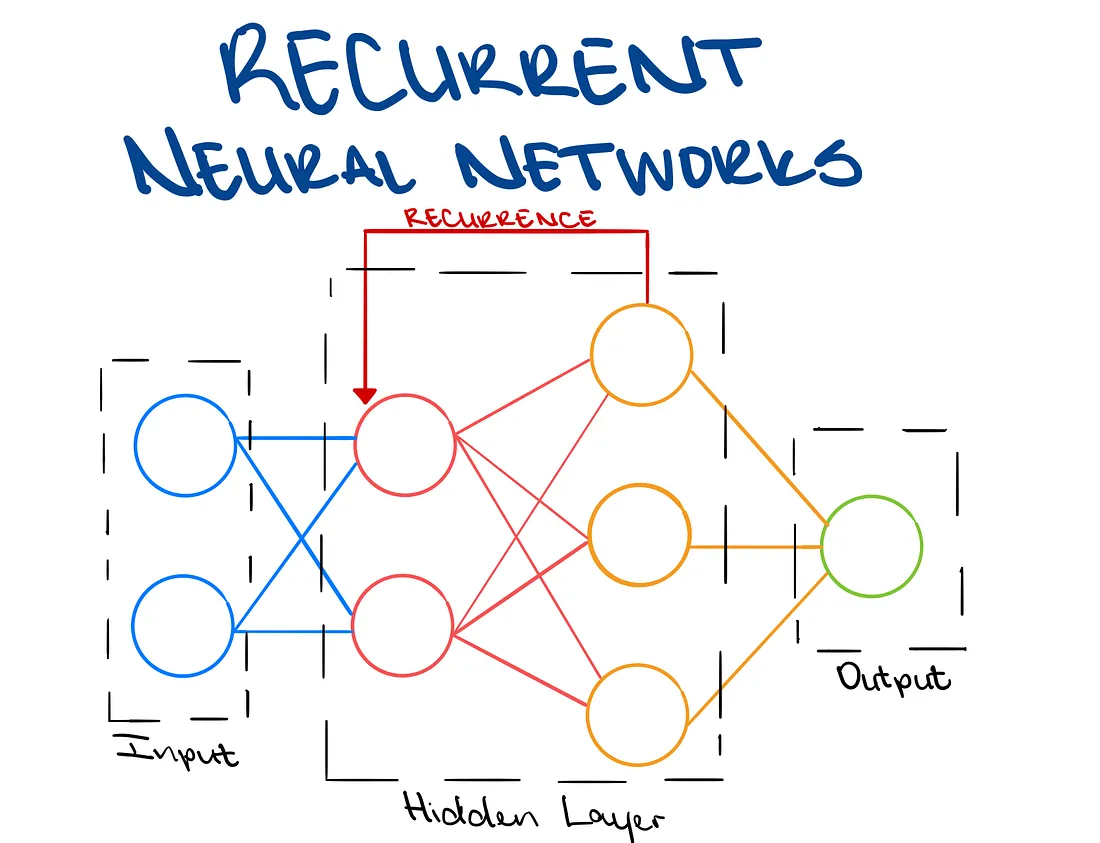)

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and F1-score of a binary classification model.
  """
  # Calculate maodel accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recll and F-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted") # _ dont want the last value (support)
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results


In [31]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model

In [32]:
# Create a tensorboard callback (need to create a new one for each model)
from helper import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [33]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings

x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model
# x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x) # create the output layer, want binary outputs so use sigmoid activation

# Create the model
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [34]:
# Inspect the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [35]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [36]:
# Fit the model
model_1_history = model_1.fit(x=train_scentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240312-180416
Epoch 1/5
215/215 [==============================] - 9s 33ms/step - loss: 0.6099 - accuracy: 0.6901 - val_loss: 0.5351 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4408 - accuracy: 0.8190 - val_loss: 0.4783 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3460 - accuracy: 0.8602 - val_loss: 0.4602 - val_accuracy: 0.7966
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2823 - accuracy: 0.8914 - val_loss: 0.4641 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2357 - accuracy: 0.9129 - val_loss: 0.4863 - val_accuracy: 0.7887


In [37]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7887


[0.48628953099250793, 0.7887139320373535]

In [38]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [39]:
# Everything above 0.5 will be the positive class, and negative below 0.5
model_1_pred_probs[0]

array([0.3212277], dtype=float32)

In [40]:
# Looka at the 10 first predictions
model_1_pred_probs[:10]

array([[0.3212277 ],
       [0.8118637 ],
       [0.9978271 ],
       [0.08935567],
       [0.0861086 ],
       [0.9353328 ],
       [0.9038672 ],
       [0.9932336 ],
       [0.9634832 ],
       [0.23288399]], dtype=float32)

In [41]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes dimensions of size 1 from the tensor, round a prediction above .5 to 1 and below .5 to 0
model_1_preds[:20]


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [42]:
# Calculate our model 1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'precision': 0.7958623979922417,
 'recall': 0.7887139107611548,
 'f1': 0.7850561936710079}

In [43]:
# Compare to our baseline results
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Visualizing the learned embeddings

In [44]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10] # check the len and the 10 ost common words

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [45]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [47]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data wich have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()
embed_weights

[array([[ 0.02163245, -0.02161808, -0.03897394, ...,  0.01987369,
          0.04906997,  0.04998096],
        [-0.02370174, -0.0067589 , -0.04154927, ..., -0.03687332,
          0.0464114 , -0.00955456],
        [ 0.03768621, -0.04197609, -0.00964793, ...,  0.01791438,
          0.05867545,  0.06057125],
        ...,
        [-0.0421729 , -0.03318219, -0.02229388, ..., -0.01228238,
         -0.00032429, -0.01360115],
        [ 0.07247735, -0.0830972 , -0.00454886, ..., -0.00194824,
          0.0280648 , -0.00837666],
        [ 0.10566352, -0.0238748 , -0.09024454, ..., -0.08874089,
          0.08812923,  0.08246066]], dtype=float32)]

Now ew've got the embeddinng matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called [projector](http://projector.tensorflow.org)

And TensorFlow also has an incredible guide on [word embeddings](https://www.tensorflow.org/tutorials/text/word_embeddings)

Extra reading on [Word2vec](https://jalammar.github.io/illustrated-word2vec/) by Jay Alammar

In [48]:
# Create embedding files (from TensorFlow's word embeddings documentation)
import io

# Antag att model_1 och words_in_vocab är definierade tidigare i koden
embed_weights = model_1.get_layer("embedding").get_weights()[0]

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  if index >= len(embed_weights):  # Check that index is whitin range
    break
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")

out_v.close()
out_m.close()

In [49]:
# Download files from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Go to [projector](http://projector.tensorflow.org) and load in the data from your download folder

## Recurrent Neural Networcs (RNN's)

RNN's are useful for sequence data.

The premise of recurrent neural network is to use the representation of previous input to aid the representation of later input.


If u want a overwiev of the internals of recurrent neural network, see the following [video](https://www.youtube.com/watch?v=SEnXr6v2ifU).

Also explore these:

[The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) by Andrej Karpathy - demonstrates the power of RNN's with examples generating various sequences.

[Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) by Chris Olah - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

### Model 2: LSTM

LSTM = Long Short Term Memory (one of the most popular LSTM cells)
Our structure of an RNN typically looks like this:
```Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)```

In [50]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape) # the shape of the output layer
#x = layers.LSTM(64, return_sequences=True)(x) # when you are stacking RNN cells together, you need to return_sequences=True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")



In [51]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [52]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [53]:
# Fit the model
model_2_history = model_2.fit(train_scentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240312-180624
Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.2182 - accuracy: 0.9210 - val_loss: 0.5549 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1543 - accuracy: 0.9431 - val_loss: 0.5795 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1312 - accuracy: 0.9521 - val_loss: 0.7065 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1037 - accuracy: 0.9602 - val_loss: 0.8167 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0850 - accuracy: 0.9691 - val_loss: 0.9168 - val_accuracy: 0.7808


In [54]:
# Make predictionswith LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[2.4692020e-01],
       [7.0132416e-01],
       [9.9974579e-01],
       [2.4793835e-02],
       [4.5922227e-04],
       [9.9812418e-01],
       [8.6236835e-01],
       [9.9983692e-01],
       [9.9963188e-01],
       [4.5574924e-01]], dtype=float32)

In [55]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [56]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.781027063798433,
 'recall': 0.7808398950131233,
 'f1': 0.7797836213601502}

In [57]:
# Compare with our baseline model :/
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU (Gated Reccurent Unit)

The GRU cell has similar features to an LSTM cell but has less parameters.

In [59]:
import tensorflow as tf
from tensorflow.keras import layers

# Create the GRU-model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# First Bidirectional GRU-layer
x = layers.Bidirectional(layers.GRU(64, return_sequences=True, dropout=0.3))(x)
# Second Bidirectional GRU-layer
x = layers.Bidirectional(layers.GRU(32, dropout=0.3))(x)  # Inget return_sequences eftersom det är det sista RNN-lagret
# A Dense-layer after RNN-layers
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

# Compile the model
#model_3.compile(loss="binary_crossentropy",
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

# Print the model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 15, 128)           74496     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                       

In [60]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [61]:
# Fit the model
model_3_history = model_3.fit(train_scentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_LSTM")])

Saving TensorBoard log files to: model_logs/model_3_LSTM/20240312-181940
Epoch 1/5
215/215 [==============================] - 17s 43ms/step - loss: 0.1461 - accuracy: 0.9514 - val_loss: 0.8511 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0871 - accuracy: 0.9701 - val_loss: 0.8038 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0700 - accuracy: 0.9717 - val_loss: 1.0041 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0651 - accuracy: 0.9726 - val_loss: 1.3893 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0612 - accuracy: 0.9731 - val_loss: 1.4638 - val_accuracy: 0.7717


In [62]:
# Make predictionswith GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[4.2595495e-03],
       [6.6465598e-01],
       [9.9999940e-01],
       [4.5914743e-02],
       [1.9678989e-06],
       [9.9999738e-01],
       [4.8249289e-01],
       [1.0000000e+00],
       [9.9999976e-01],
       [7.1558702e-01]], dtype=float32)

In [63]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [64]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7747861668850706,
 'recall': 0.7716535433070866,
 'f1': 0.7688960790251899}

old model_3_results:

{'accuracy': 76.77165354330708,

 'precision': 0.7679905783589133,

 'recall': 0.7677165354330708,

 'f1': 0.7663871505080737}


In [ ]:
baseline_results

In [ ]:
#239